# Basic CNN Model
***
## Import Packages

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import os
from os.path import join

from sklearn.metrics import confusion_matrix
import itertools

# import tensorflow as tf
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, SeparableConv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.utils import np_utils
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.python.compiler.tensorrt import trt_convert as trt
# print(os.listdir("../input"))

ModuleNotFoundError: No module named 'tensorflow.keras.python'

In [9]:
from tensorflow.python. import trt_convert

ModuleNotFoundError: No module named 'tensorflow.python.__compiler_version__'

## Create Paths to image folders of train, test and valid

In [61]:
base_dir = "../input/melanoma/DermMel/"

train_dir = os.path.join(base_dir, 'train_sep')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

training_mel_path = os.path.join(train_dir, 'Melanoma')
training_not_mel_path = os.path.join(train_dir, 'NotMelanoma')

test_mel_path = os.path.join(test_dir, 'Melanoma')
test_not_mel_path = os.path.join(test_dir, 'NotMelanoma')

valid_mel_path = os.path.join(valid_dir, 'Melanoma')
valid_not_mel_path = os.path.join(valid_dir, 'NotMelanoma')

## Define Sample Sizes and Batch Sizes

In [61]:
num_train_samples = 10682
num_val_samples = 3562
num_test_samples = 3561

train_batch_size = 64
val_batch_size = 64
test_batch_size = 64

## Create train, test and valid generators

In [62]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size = train_batch_size,
                                                   class_mode = 'binary',
                                                   target_size = (224, 224))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 batch_size = test_batch_size,
                                                 class_mode = 'binary',
                                                 target_size = (224, 224))

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   batch_size = val_batch_size,
                                                   class_mode = 'binary',
                                                   target_size = (224, 224))

Found 10682 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.


## Instantiate Model

In [3]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dropout(rate = 0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# print(model.summary())

NameError: name 'models' is not defined

## Compile model

In [65]:
# Compile model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Fit model

In [66]:
# Fit model on training data.
history = model.fit_generator(train_generator,
                              epochs=15,
                              steps_per_epoch = 10682 // train_batch_size,
                              validation_data = valid_generator,
                              validation_steps = 3562 // val_batch_size)

Train for 166 steps, validate for 55 steps
Epoch 1/15
166/166 [==============================] - 114s 687ms/step - loss: 8.4098 - accuracy: 0.5633 - val_loss: 14.3536 - val_accuracy: 0.4983
Epoch 2/15
166/166 [==============================] - 113s 681ms/step - loss: 3.1387 - accuracy: 0.5977 - val_loss: 1.2658 - val_accuracy: 0.5980
Epoch 3/15
166/166 [==============================] - 111s 669ms/step - loss: 1.9512 - accuracy: 0.5994 - val_loss: 2.2612 - val_accuracy: 0.6173
Epoch 4/15
166/166 [==============================] - 110s 664ms/step - loss: 1.2447 - accuracy: 0.6351 - val_loss: 0.6390 - val_accuracy: 0.7006
Epoch 5/15
166/166 [==============================] - 107s 646ms/step - loss: 1.2704 - accuracy: 0.6136 - val_loss: 0.7010 - val_accuracy: 0.6926
Epoch 6/15
166/166 [==============================] - 107s 647ms/step - loss: 0.8980 - accuracy: 0.6365 - val_loss: 0.7049 - val_accuracy: 0.6148
Epoch 7/15
166/166 [==============================] - 109s 654ms/step - loss: 0.

## Print Class Indices

In [68]:
print(train_generator.class_indices)
print(valid_generator.class_indices)
print(test_generator.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}


## Plot training and validation accuracy and loss

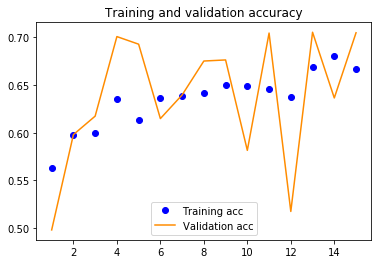

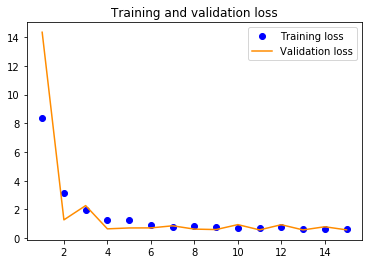

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'darkorange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'darkorange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model Summary

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  19267712  
_________________________________________________________________
dense_7 (Dense)              multiple                  4128      
_________________________________________________________________
dense_8 (Dense)              multiple                  33        
Total params: 19,271,873
Trainable params: 19,271,873
Non-trainable params: 0
_________________________________________________________________


## Create Confusion Matrix

In [82]:
validation_accuracy = model.evaluate_generator(valid_generator, steps = 3562 // val_batch_size)

In [83]:
validation_accuracy[1]

0.70454544

In [85]:
y_true = valid_generator.classes

In [87]:
y_proba = model.predict_generator(valid_generator)

In [88]:
y_preds = [1 if proba > 0.5 else 0 for proba in y_proba[:,0]]

In [89]:
cm_def = np.array([['True Negative', 'False Positive'],
                ['False Negative', 'True Positive']])
cm_def = pd.DataFrame(cm_def,columns = ['pred neg', 'pred pos'], index = ['actual neg','actual pos'])


cm = confusion_matrix(y_true, y_preds)
cm_df = pd.DataFrame(cm, columns = ['pred neg', 'pred pos'], index = ['actual neg','actual pos'])

from IPython.display import display
display(cm_def)
display(cm_df)

,pred neg,pred pos
actual neg,True Negative,False Positive
actual pos,False Negative,True Positive


,pred neg,pred pos
actual neg,1092,689
actual pos,1119,662


In [90]:
tn, fp, fn, tp = cm.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [91]:
print(f'Precision: {round(precision*100,2)}%')
print(f'Recall: {round(recall*100, 2)}%')

Precision: 49.0%
Recall: 37.17%


## Save Model

In [93]:
def save_model(model, file_path):
    model_json = model.to_json()
    with open('model.json', 'w') as json_file:
        json_file.write(model_json)

In [1]:
#save_model(model, os.listdir("../input"))

In [2]:
model.save(filepath = './model_sample.h5')

NameError: name 'model' is not defined